In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [79]:
def read_conll_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    return lines


In [80]:
def process_conll_data(lines):
    data = []
    sentence = []
    for line in lines:
        line = line.strip().split('\t')
        if len(line) > 1:  # Non-empty line
            #print("entered if")
            #print(line[0], line[-1])
            word, label = line[0], line[-1]
            sentence.append((word, label))
        else:  # Empty line, indicating the end of a sentence
            
            data.append(sentence)
            sentence = []
    return data

In [81]:
file_path = 'wnut 16.txt.conll'
conll_lines = read_conll_file(file_path)

processed_data = process_conll_data(conll_lines)

print("Total number of sentences : " , len(processed_data))
print("First sentence : ",  processed_data[0])

Total number of sentences :  2393
First sentence :  [('@SammieLynnsMom', 'O'), ('@tg10781', 'O'), ('they', 'O'), ('will', 'O'), ('be', 'O'), ('all', 'O'), ('done', 'O'), ('by', 'O'), ('Sunday', 'O'), ('trust', 'O'), ('me', 'O'), ('*wink*', 'O')]


In [82]:
from collections import Counter

#value counts of each NEW category in the dateset 

# Flatten the list of lists
flattened_data = [item for sublist in processed_data for item in sublist]

# Extract the second elements and perform value counts
counts = Counter(elem[1] for elem in flattened_data)
print(counts)

# Print the result
for key, value in counts.items():
    print(f"Label '{key}': {value} occurrences")

Counter({'O': 44000, 'B-person': 449, 'I-other': 320, 'B-geo-loc': 276, 'B-other': 225, 'I-person': 215, 'B-company': 171, 'I-facility': 105, 'B-facility': 104, 'B-product': 97, 'I-product': 80, 'I-musicartist': 61, 'B-musicartist': 55, 'B-sportsteam': 51, 'I-geo-loc': 49, 'I-movie': 46, 'I-company': 36, 'B-movie': 34, 'B-tvshow': 34, 'I-tvshow': 31, 'I-sportsteam': 23})
Label 'O': 44000 occurrences
Label 'B-geo-loc': 276 occurrences
Label 'B-facility': 104 occurrences
Label 'I-facility': 105 occurrences
Label 'B-movie': 34 occurrences
Label 'I-movie': 46 occurrences
Label 'B-company': 171 occurrences
Label 'B-product': 97 occurrences
Label 'B-person': 449 occurrences
Label 'B-other': 225 occurrences
Label 'I-other': 320 occurrences
Label 'B-sportsteam': 51 occurrences
Label 'I-sportsteam': 23 occurrences
Label 'I-product': 80 occurrences
Label 'I-company': 36 occurrences
Label 'I-person': 215 occurrences
Label 'I-geo-loc': 49 occurrences
Label 'B-tvshow': 34 occurrences
Label 'B-music

In [83]:
#Lets combine all the suffixes

# Combine categories with the same suffix
combined_counts = Counter()
for label, count in counts.items():
    if label == 'O':
        combined_counts[label] += count
    else:
        prefix, suffix = label.split('-', 1)
        if prefix in ['B', 'I']:
            combined_label = suffix
            combined_counts[combined_label] += count
        else:
            combined_counts[label] += count

# Print the combined result
for key, value in combined_counts.items():
    print(f"Label '{key}': {value} occurrences")

Label 'O': 44000 occurrences
Label 'geo-loc': 325 occurrences
Label 'facility': 209 occurrences
Label 'movie': 80 occurrences
Label 'company': 207 occurrences
Label 'product': 177 occurrences
Label 'person': 664 occurrences
Label 'other': 545 occurrences
Label 'sportsteam': 74 occurrences
Label 'tvshow': 65 occurrences
Label 'musicartist': 116 occurrences


In [84]:
# Calculate percentages
total_count = sum(combined_counts.values())
percentages = {label: count / total_count * 100 for label, count in combined_counts.items()}

# Print percentages in text form
for label in combined_counts.keys():
    print(f"Label '{label}': {percentages[label]:.2f}%")


Label 'O': 94.70%
Label 'geo-loc': 0.70%
Label 'facility': 0.45%
Label 'movie': 0.17%
Label 'company': 0.45%
Label 'product': 0.38%
Label 'person': 1.43%
Label 'other': 1.17%
Label 'sportsteam': 0.16%
Label 'tvshow': 0.14%
Label 'musicartist': 0.25%


In [85]:
#As we can see 'O' is the most common tag 

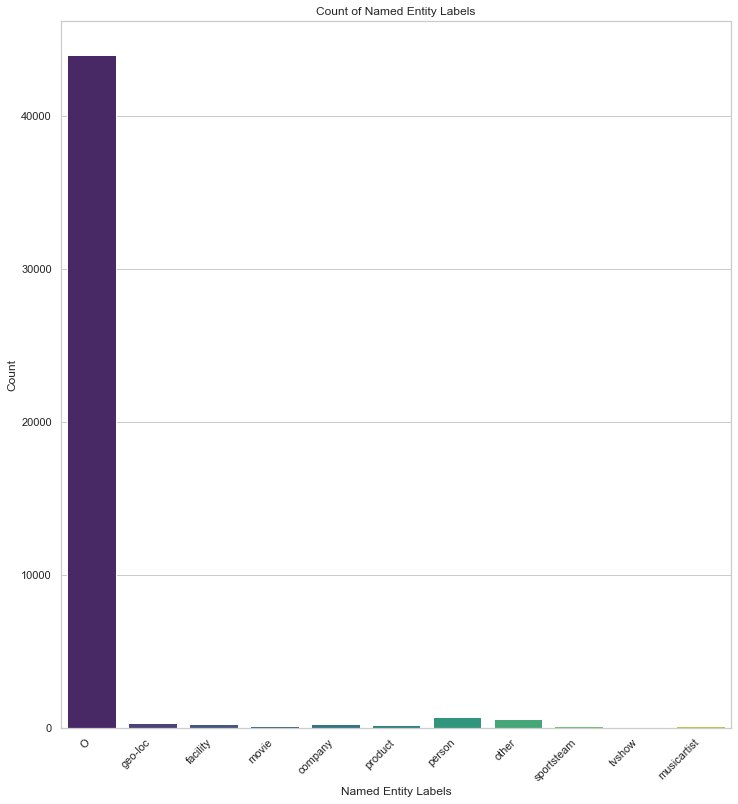

In [86]:
df = pd.DataFrame.from_dict(combined_counts, orient='index', columns=['Count']).reset_index()

# Plot a bar plot
plt.figure(figsize=(12, 13))
sns.barplot(x='index', y='Count', data=df, palette="viridis")
plt.title('Count of Named Entity Labels')
plt.xlabel('Named Entity Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

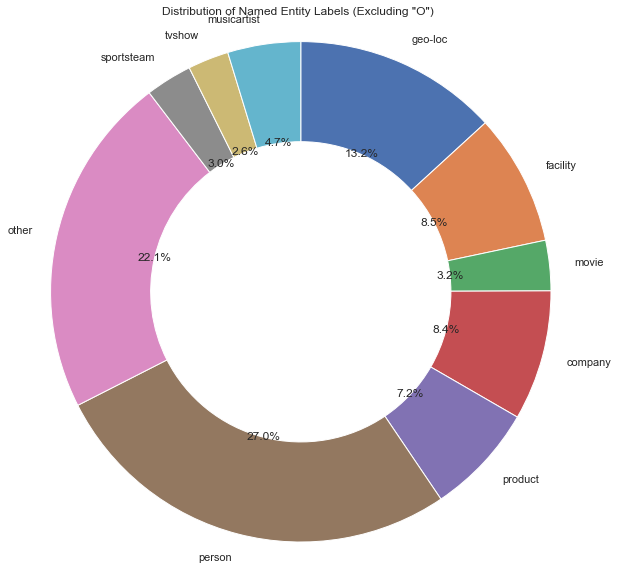

In [87]:
#Exclude label 'O' then plotting a pie chart


# Exclude the 'O' label
filtered_counts = {label: count for label, count in combined_counts.items() if label != 'O'}

# Larger pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(filtered_counts.values(), labels=filtered_counts.keys(), autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Named Entity Labels (Excluding "O")')
plt.show()

In [92]:
#Processed data is a list of lists with each sublist represeting a setence

In [102]:
#Converting the list to a dataframe


# Convert to DataFrame
data_list = []
for sentence_num, sentence in enumerate(processed_data, start=1):
    for word, tag in sentence:
        data_list.append((f'Sentence: {sentence_num}', word, tag))

data = pd.DataFrame(data_list, columns=['Sentence #', 'Word', 'Tag'])


In [103]:
data.head(5)

,Sentence #,Word,Tag
0,Sentence: 1,@SammieLynnsMom,O
1,Sentence: 1,@tg10781,O
2,Sentence: 1,they,O
3,Sentence: 1,will,O
4,Sentence: 1,be,O


In [106]:
data.shape

(46462, 3)

In [107]:
print("Number of sentences: ", len(data.groupby(['Sentence #'])))

Number of sentences:  2393


In [108]:
words = list(set(data["Word"].values))
n_words = len(words)
print("Number of unique words in the dataset: ", n_words)

Number of unique words in the dataset:  10585


In [109]:
n_tags = len(data.groupby(['Tag']))
print("Number of Labels: ", n_tags)

Number of Labels:  21


In [110]:
tags = list(set(data["Tag"].values))
print("Tags:", tags)

Tags: ['I-company', 'B-movie', 'I-musicartist', 'B-geo-loc', 'I-movie', 'B-product', 'B-company', 'I-tvshow', 'B-sportsteam', 'O', 'B-person', 'I-geo-loc', 'B-other', 'I-facility', 'I-person', 'I-other', 'I-sportsteam', 'B-musicartist', 'I-product', 'B-facility', 'B-tvshow']


In [111]:
#let's check the frequency of each tag
data['Tag'].value_counts() 

O                44000
B-person           449
I-other            320
B-geo-loc          276
B-other            225
I-person           215
B-company          171
I-facility         105
B-facility         104
B-product           97
I-product           80
I-musicartist       61
B-musicartist       55
B-sportsteam        51
I-geo-loc           49
I-movie             46
I-company           36
B-movie             34
B-tvshow            34
I-tvshow            31
I-sportsteam        23
Name: Tag, dtype: int64

In [112]:
#Other has the maximum frequency followed by other and geo-loc 

In [113]:
sentences = processed_data.copy()

In [119]:
# Find the length of the longest and shortest sublists
longest_length = max(len(sublist) for sublist in sentences)
shortest_length = min(len(sublist) for sublist in sentences)

# Display the results
print(f"Length of the longest sentence: {longest_length}")
print(f"Length of the shortest sentence: {shortest_length}")

Length of the longest sentence: 39
Length of the shortest sentence: 1


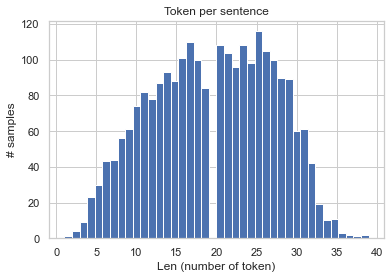

In [120]:
# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=40)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

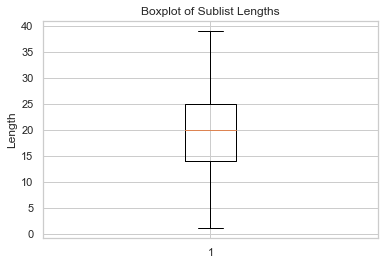

In [122]:
# Calculate the lengths of sublists
lengths = [len(sublist) for sublist in sentences]

# Plot a boxplot
plt.boxplot(lengths)
plt.title('Boxplot of sentences length')
plt.ylabel('Length')
plt.show()

In [123]:
# 50% of the values lie between 14 and 25 so we can say that most sentences have length between 15 and 30

- <b> NOTE <b> 
    
-   We can either use Word2Vec encoding on each word with One hot encoding on tags 
-   or
-   We can first give each word an index and then use that index to encode it to an embedding size and one hot encode the  tags
    
-   Below we use the second approach

- <b>Further PreProcessing:</b>

- We will convert each text word to a corresponding integer ID using the <b> word2idx dictionary</b>. Doing so saves a lot of memory.
- In order to feed the data to out Bi-LSTM-CRF model, we need to ensure that all text should be of the same length. 
 - The method sequence.pad_sequences() and variable MAX_LEN are used for this purpose.
 - The text which are shorter than MAX_LEN are padded to get them to the same length, whereas text which are longer than MAX_LEN are truncated.

In [124]:
import sklearn

# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
#Pad is given a separate tag altogether
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}
print("The word Sunday is identified by the index: {}".format(word2idx["Sunday"]))
print("The labels B-geo-loc(which defines Geopraphical Enitities) is identified by the index: {}".format(tag2idx["B-geo-loc"]))


The word Sunday is identified by the index: 9717
The labels B-geo-loc(which defines Geopraphical Enitities) is identified by the index: 4


In [125]:
#PAD is given a separate tag as can be seen below
print(tag2idx)

{'I-company': 1, 'B-movie': 2, 'I-musicartist': 3, 'B-geo-loc': 4, 'I-movie': 5, 'B-product': 6, 'B-company': 7, 'I-tvshow': 8, 'B-sportsteam': 9, 'O': 10, 'B-person': 11, 'I-geo-loc': 12, 'B-other': 13, 'I-facility': 14, 'I-person': 15, 'I-other': 16, 'I-sportsteam': 17, 'B-musicartist': 18, 'I-product': 19, 'B-facility': 20, 'B-tvshow': 21, 'PAD': 0}


In [133]:
print(word2idx['Fulham'])

2


In [127]:
#The longest sentence has length 39 
MAX_LEN = 39

In [146]:
for s in sentences:
    for w in s:
        print(s)
        print(w)
        print( "Word" , w[0] , "Index" , word2idx[w[0]])
        print( "Tag" ,w[1] , "Index" ,tag2idx[w[1]])
        break 
    break

[('@SammieLynnsMom', 'O'), ('@tg10781', 'O'), ('they', 'O'), ('will', 'O'), ('be', 'O'), ('all', 'O'), ('done', 'O'), ('by', 'O'), ('Sunday', 'O'), ('trust', 'O'), ('me', 'O'), ('*wink*', 'O')]
('@SammieLynnsMom', 'O')
Word @SammieLynnsMom Index 714
Tag O Index 10


In [151]:
from tensorflow import keras 

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py)

In [ ]:
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]

# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])

# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in sentences]

# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])
from keras.utils import to_categorical

# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]  # n_tags+1(PAD)
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape


print('Raw Sample:\n ', ' '.join([w[0] for w in sentences[0]]))
print('\n ' )
print('Raw Label:\n ', ' '.join([w[2] for w in sentences[0]]))
print('\n ' )
print('After processing, sample:\n', X[0])
print('\n ' )
print('After processing, labels:\n', y[0])

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5


  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-rgm2ist_\\tensorflow-gpu_962ceab630e34e2e80359b8e5501f78a\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-rgm2ist_\\tensorflow-gpu_962ceab630e34e2e80359b8e5501f78a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-_xgh67mf'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-rgm2ist_\tensorflow-gpu_962ceab630e34e2e80359b8e5501f78a\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

In [157]:
import tensorflow as tf

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py)

In [154]:
    pip list 

Package                       VersionNote: you may need to restart the kernel to use updated packages.
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.6
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.3.2
anaconda-project              0.10.2
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall    

In [156]:
pip uninstall tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [158]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.6
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.3.2
anaconda-project              0.10.2
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backp

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import pandas as pd

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

ModuleNotFoundError: No module named 'keras'